# Project M 18 - Big Data Mart Sales Problem

Objective - To develop a ML model for Big data mart brand sales prediction based on various product & outlet charcateristics

Approach - Since the sales(Target variable) is a continous type, regression modelling will be best approach

# Importing Libraries

In [2]:
# Importing datasets
bdm_train = pd.read_csv('bigdatamart_Train.csv')
bdm_test = pd.read_csv('bigdatamart_Test.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Performing exploratory data analysis 

In [3]:
bdm_train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
bdm_test.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
print(bdm_train.shape)
print(bdm_test.shape)

(8523, 12)
(5681, 11)


In [6]:
bdm_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
bdm_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [8]:
bdm_train['New_C'] = 'Train'
bdm_test['New_C'] = 'Test'
df = pd.concat([bdm_train,bdm_test], ignore_index = True)

<IPython.core.display.Javascript object>

In [9]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_C
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Train


In [10]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_C
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,Test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,Test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,Test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,Test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,Test


Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
New_C                           0
dtype: int64


<IPython.core.display.Javascript object>

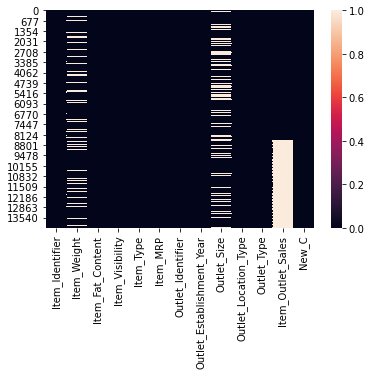

In [11]:
print(df.isnull().sum())
sns.heatmap(df.isnull())

In [12]:
df.shape

(14204, 13)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

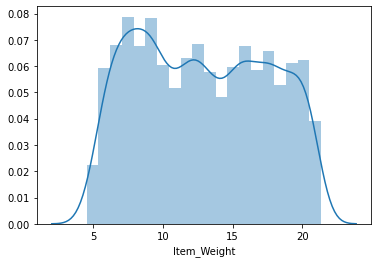

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

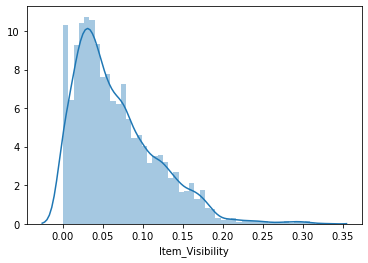

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

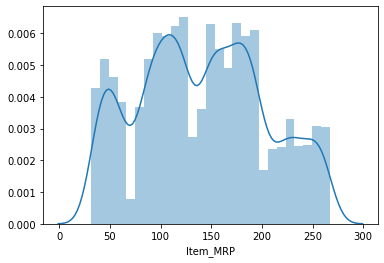

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

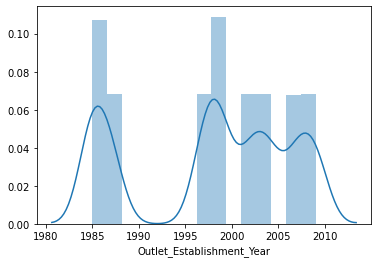

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

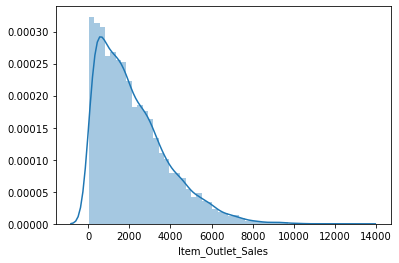

In [13]:
for i in bdm_train.describe().columns:
    sns.distplot(bdm_train[i].dropna())
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

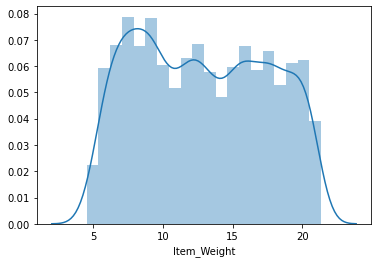

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

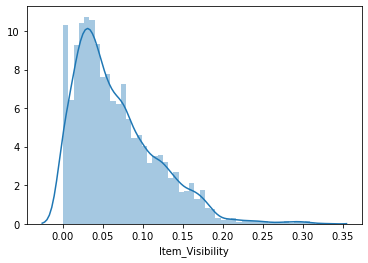

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

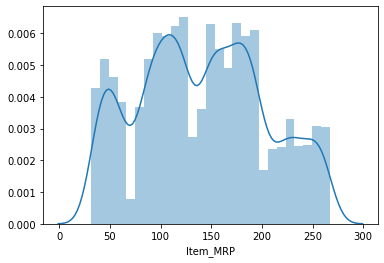

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

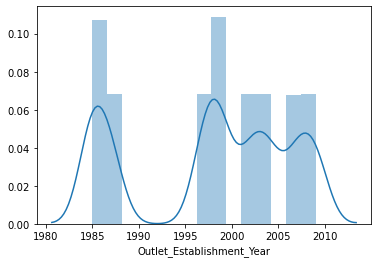

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

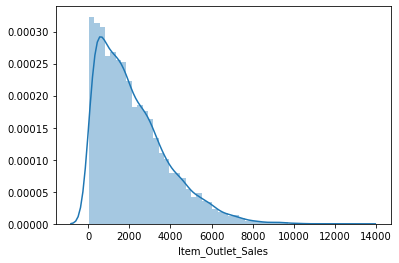

In [14]:
for i in df.describe().columns:
    sns.distplot(bdm_train[i].dropna())
    plt.show()

In [15]:
# Item outlet sales, item visibility has right sided skewness

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

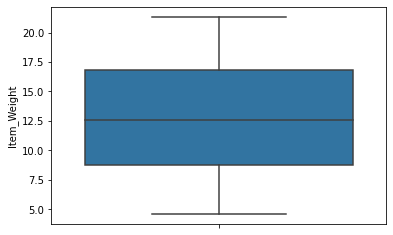

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

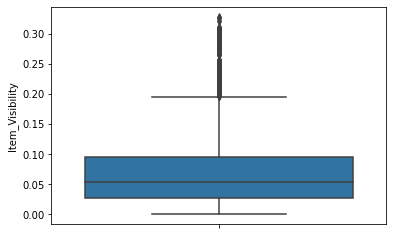

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

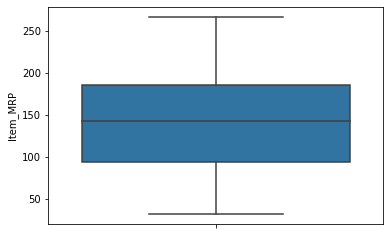

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

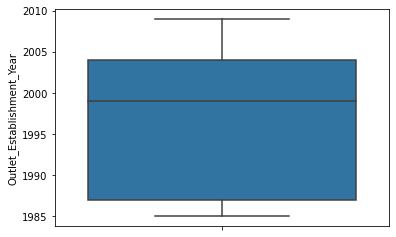

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

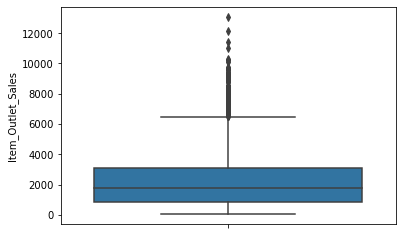

In [16]:
for i in df.describe().columns:
    sns.boxplot(bdm_train[i].dropna(), orient = 'v')
    plt.show()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

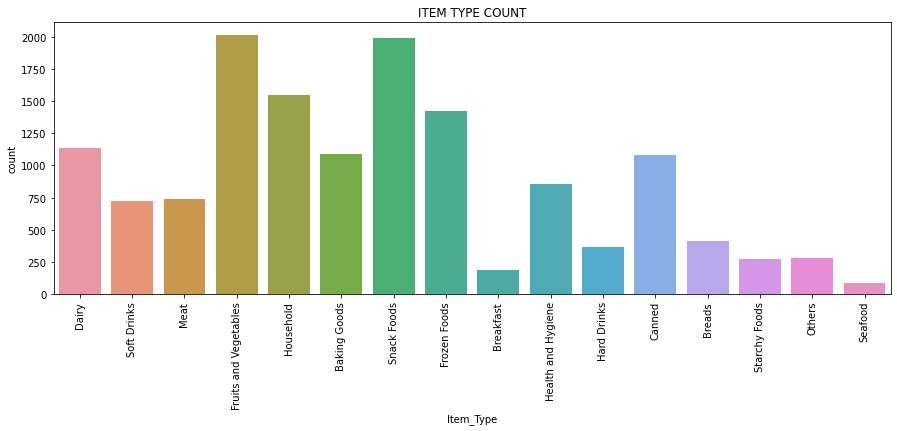

In [17]:
print(df.Item_Type.value_counts())
plt.figure(figsize = (15,5))
sns.countplot(df.Item_Type)
plt.xticks(rotation = 90)
plt.title('ITEM TYPE COUNT')
plt.show()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

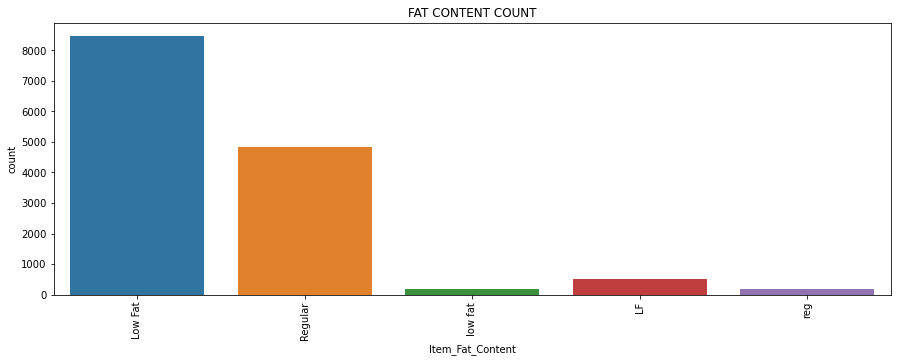

In [18]:
print(df.Item_Fat_Content.value_counts())
plt.figure(figsize = (15,5))
sns.countplot(df.Item_Fat_Content)
plt.xticks(rotation = 90)
plt.title('FAT CONTENT COUNT')
plt.show()

In [19]:
df.Item_MRP.value_counts()

172.0422    8
179.7660    7
127.1020    7
177.9370    7
123.1046    7
           ..
176.9712    1
253.6014    1
118.4808    1
230.8010    1
192.0188    1
Name: Item_MRP, Length: 8052, dtype: int64

In [20]:
df.Item_MRP.max()

266.8884

In [21]:
df.Item_MRP.min()

31.29

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

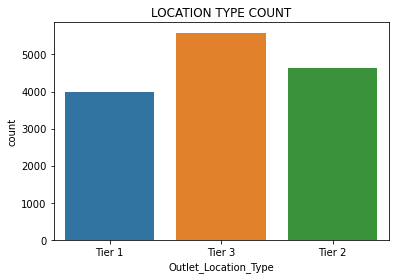

In [22]:
print(df.Outlet_Location_Type.value_counts())
sns.countplot(df.Outlet_Location_Type)
plt.title('LOCATION TYPE COUNT')
plt.show()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

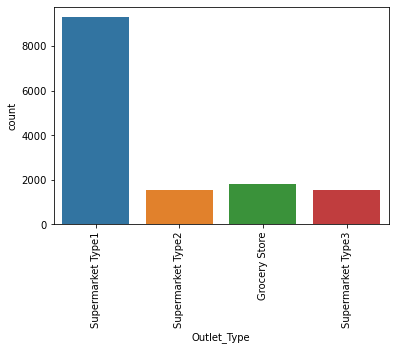

In [23]:
print(df.Outlet_Type.value_counts())
sns.countplot(df.Outlet_Type)
plt.xticks(rotation = 90)

In [24]:
# Performing encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
list = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for i in list:
    df[i]=le.fit_transform(df[i].astype(str))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

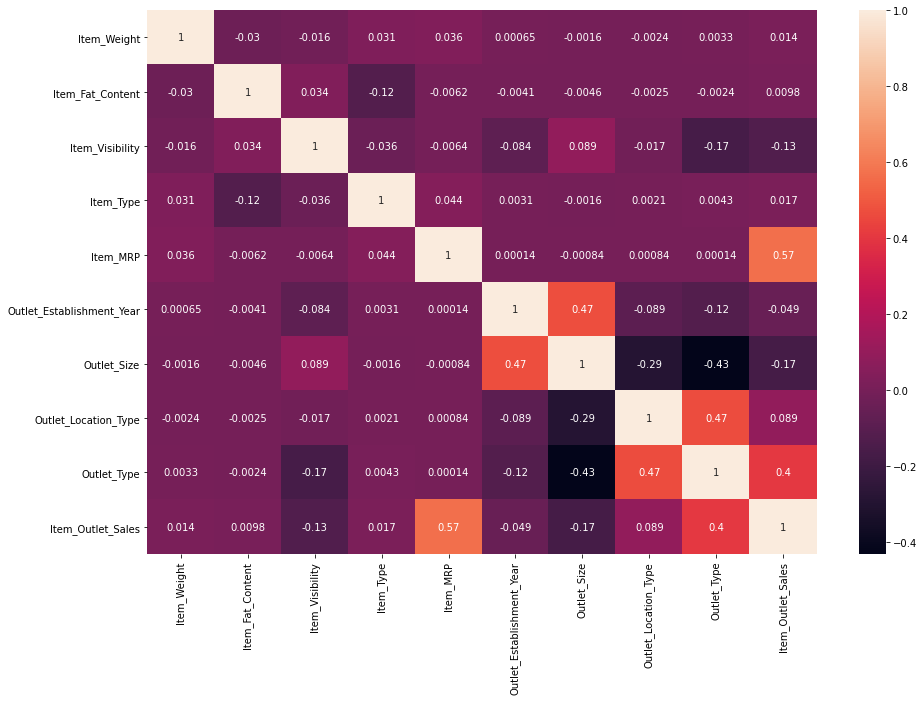

In [25]:
cor_df = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor_df, annot = True)

In [26]:
#dropping columns with null values & non relevent data
df.drop(['Item_Identifier','Outlet_Identifier','Item_Fat_Content','Outlet_Size'], axis =1,inplace = True)

In [27]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace =True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

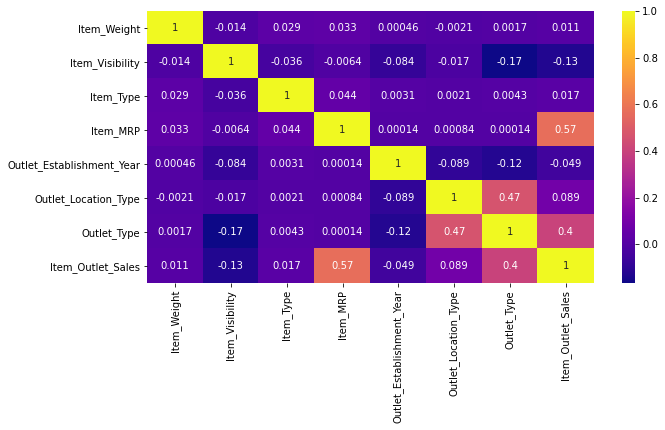

In [28]:
cor_df = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(cor_df, annot = True, cmap = 'plasma')

In [29]:
#checking for skewness
df.skew()

Item_Weight                  0.111314
Item_Visibility              1.195175
Item_Type                    0.099574
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
Outlet_Location_Type        -0.209053
Outlet_Type                  0.927344
Item_Outlet_Sales            1.177531
dtype: float64

# Building Model

In [30]:
train = df.loc[df['New_C']=='Train']
test = df.loc[df['New_C']=='Test']
x_train = train.drop(['Item_Outlet_Sales','New_C'], axis = 1)
y_train = pd.DataFrame(train['Item_Outlet_Sales'])
x_test = test.drop(['New_C','Item_Outlet_Sales'], axis = 1)

<IPython.core.display.Javascript object>

In [31]:
x_test.shape

(5681, 7)

In [32]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [33]:
# Finding best algorithm & checking for under & over fitting
import warnings
warnings.filterwarnings('ignore')
model = [LinearRegression(),Lasso(alpha = 0.0001),Ridge(alpha = 0.0001), DecisionTreeRegressor(), ElasticNet(alpha = 0.0001), RandomForestRegressor(),AdaBoostRegressor()]
for m in model:
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    print(f"For algorithm {m} Score is {round(m.score(x_train,y_train)*100)} \n")

For algorithm LinearRegression() Score is 50.0 

For algorithm Lasso(alpha=0.0001) Score is 50.0 

For algorithm Ridge(alpha=0.0001) Score is 50.0 

For algorithm DecisionTreeRegressor() Score is 100.0 

For algorithm ElasticNet(alpha=0.0001) Score is 50.0 

For algorithm RandomForestRegressor() Score is 94.0 

For algorithm AdaBoostRegressor() Score is 50.0 



In [34]:
# Developing model
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred = dtr.predict(x_test)
print(f"Score is {round(dtr.score(x_train,y_train)*100)} \n")

Score is 100.0 



In [35]:
print(f"Score is {round(dtr.score(x_test,pred)*100)} \n")

Score is 100.0 



# Saving the model

In [36]:
import joblib
joblib.dump(dtr,'Project_m18_Big_data_Mart.pkl')

['Project_m18_Big_data_Mart.pkl']

In [37]:
joblib.load('Project_m18_Big_data_Mart.pkl')

DecisionTreeRegressor()

<IPython.core.display.Javascript object>

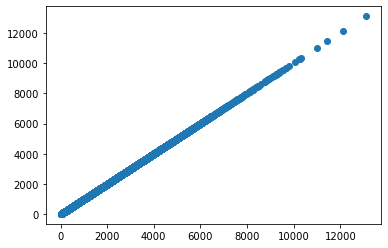

In [40]:
plt.scatter(dtr.predict(x_train),y_train)